<a href="https://colab.research.google.com/github/archie-cm/Investigate-Hotel-Business-with-Data/blob/main/Investigate_Hotel_Business_using_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sub Task 1
Stages of Tasks


1. Download the file "Dataset"
2. Solve null data (Hint: Pay attention to the number of null data and the type of each column, to choose the right method.)
3. Replace the value that does not match (Hint: Pay attention to the "meal" column)
4. Remove unnecessary data (Hint: Pay attention to the total number of guests for each booking)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/mini project/Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.00,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.00,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.00,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.00,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.00,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.00,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.00,NaN,0,Personal,98.00,0,1,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Check Null Data

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

company                          94.31
agent                            13.69
city                              0.41
children                          0.00
hotel                             0.00
is_repeated_guest                 0.00
total_of_special_requests         0.00
required_car_parking_spaces       0.00
adr                               0.00
customer_type                     0.00
days_in_waiting_list              0.00
deposit_type                      0.00
booking_changes                   0.00
previous_bookings_not_canceled    0.00
previous_cancellations            0.00
market_segment                    0.00
distribution_channel              0.00
is_canceled                       0.00
meal                              0.00
babies                            0.00
adults                            0.00
stays_in_weekdays_nights          0.00
stays_in_weekend_nights           0.00
arrival_date_day_of_month         0.00
arrival_date_week_number          0.00
arrival_date_month       

In [ ]:
num_missingvalue = ['company','agent','children']
df[num_missingvalue].describe()

,company,agent,children
count,"6,797.00","103,050.00","119,386.00"
mean,189.27,86.69,0.10
std,131.66,110.77,0.40
min,6.00,1.00,0.00
25%,62.00,9.00,0.00
50%,179.00,14.00,0.00
75%,270.00,229.00,0.00
max,543.00,535.00,10.00


In [ ]:
cat_missingvalue = ['city']
df[cat_missingvalue].describe()

,city
count,118902
unique,177
top,Kota Denpasar
freq,48590


## Impute Missing Value

In [ ]:
df['company'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['children'].fillna(0, inplace=True)
df['city'].fillna('unknown',inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

hotel                            0.00
distribution_channel             0.00
total_of_special_requests        0.00
required_car_parking_spaces      0.00
adr                              0.00
customer_type                    0.00
days_in_waiting_list             0.00
company                          0.00
agent                            0.00
deposit_type                     0.00
booking_changes                  0.00
previous_bookings_not_canceled   0.00
previous_cancellations           0.00
is_repeated_guest                0.00
market_segment                   0.00
is_canceled                      0.00
city                             0.00
meal                             0.00
babies                           0.00
children                         0.00
adults                           0.00
stays_in_weekdays_nights         0.00
stays_in_weekend_nights          0.00
arrival_date_day_of_month        0.00
arrival_date_week_number         0.00
arrival_date_month               0.00
arrival_date

## Handling Unmatch Value

In [ ]:
df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
df['meal'].replace('Undefined', 'No Meal', inplace = True)

In [ ]:
df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## Handling Unnecessary Values

In [ ]:
df.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
df.children.value_counts()

0.00     110800
1.00       4861
2.00       3652
3.00         76
10.00         1
Name: children, dtype: int64

In [ ]:
df.babies.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
df['guest'] = df['adults'] + df['children'] + df['babies']

In [ ]:
df.groupby('reservation_status')['guest'].count()

reservation_status
Canceled     43017
Check-Out    75166
No-Show       1207
Name: guest, dtype: int64

# Sub Task 2
Stages of Tasks
1. Make an aggregate table that shows the comparison of the number of hotel bookings each month based on the type of hotel (Hint: Pay attention to the year of arrival data)
2. Normalize the data (Hint: Pay attention to the data for September and October)
3. Sort data by month (Hint: Pay attention to writing the name of the month to make visualization easier)
4. Make a plot that can show changes in the increase or decrease in the number of hotel bookings each month based on the type of hotel (Hint: Pay attention to the type of plot used)
5. Write an interpretation of the plot results in the previous step (Hint: Pay attention to holidays in Indonesia)

## The Number of Hotel Booking each Month based on The Type of Hotel

In [ ]:
# check guest column = 0
df[df['guest']==0].shape[0]

180

In [ ]:
hotel_per_month = df[df['guest']>0].groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
hotel_per_month

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


July, August, September, October are taken from 3 years and other are taken from 2 years. So, Normalization is necessary that can comparison  

## Data Normalize

In [ ]:
# make normalize with average
hotel_per_month['normalize'] = round(hotel_per_month['count']/hotel_per_month['nunique'])
hotel_per_month

,hotel,arrival_date_month,nunique,count,normalize
0,City Hotel,April,2,4950,"2,475.00"
1,City Hotel,August,2,7885,"3,942.00"
2,City Hotel,December,2,7594,"3,797.00"
3,City Hotel,February,2,4114,"2,057.00"
4,City Hotel,January,2,4336,"2,168.00"
5,City Hotel,July,2,8221,"4,110.00"
6,City Hotel,June,2,7469,"3,734.00"
7,City Hotel,March,2,3730,"1,865.00"
8,City Hotel,May,2,6434,"3,217.00"
9,City Hotel,November,2,7392,"3,696.00"


## Data Sort by Months

In [ ]:
# make easier visualization in month with get 3 first name of month
hotel_per_month['month'] = hotel_per_month['arrival_date_month'].str[:3]
hotel_per_month['month'] = pd.Categorical(hotel_per_month['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [ ]:
hotel_per_month.sort_values('month')

,hotel,arrival_date_month,nunique,count,normalize,month
4,City Hotel,January,2,4336,"2,168.00",Jan
16,Resort Hotel,January,2,2435,"1,218.00",Jan
3,City Hotel,February,2,4114,"2,057.00",Feb
15,Resort Hotel,February,2,2645,"1,322.00",Feb
7,City Hotel,March,2,3730,"1,865.00",Mar
19,Resort Hotel,March,2,2191,"1,096.00",Mar
0,City Hotel,April,2,4950,"2,475.00",Apr
12,Resort Hotel,April,2,3102,"1,551.00",Apr
20,Resort Hotel,May,2,3334,"1,667.00",May
8,City Hotel,May,2,6434,"3,217.00",May


## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


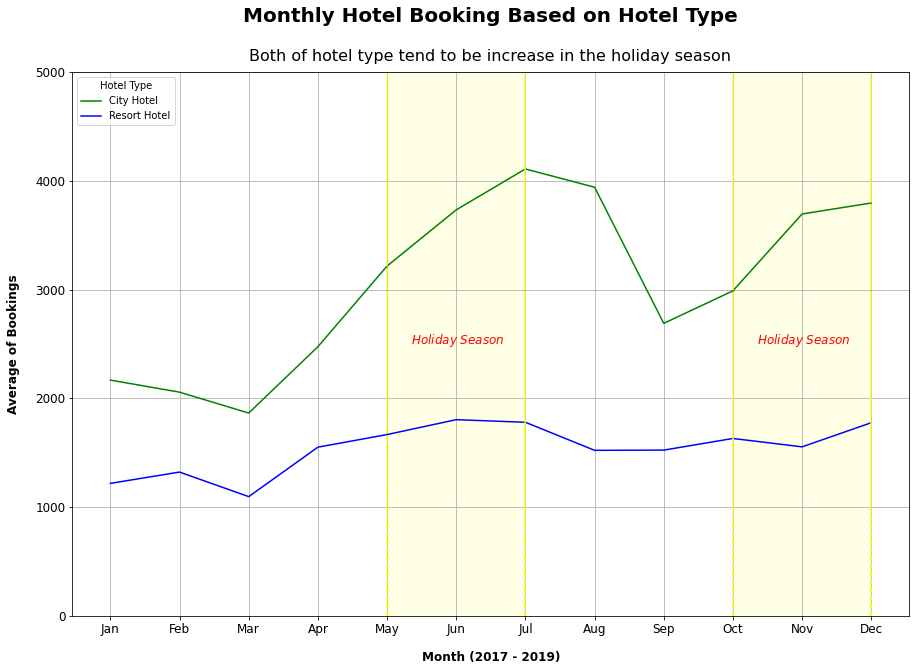

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='normalize', hue='hotel', data=hotel_per_month, palette=['green', 'blue'])

#set title, caption and legend
plt.grid()
plt.title('Monthly Hotel Booking Based on Hotel Type', fontsize=20, fontweight='bold', pad=50)
plt.text(x=2,y=5100, s='Both of hotel type tend to be increase in the holiday season', fontsize=16)
plt.legend(title='Hotel Type')

#set label
plt.xlabel('Month (2017 - 2019)', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average of Bookings', fontsize=12, fontweight='bold', labelpad=15)
plt.ylim(0,5000)
plt.tick_params(axis='both', which='major', labelsize=12)


#set holiday season
plt.axvline(x=4, color='yellow', ls='--')
plt.axvline(x=6, color='yellow', ls='--')
plt.stackplot([4, 5, 6], [5000], color='yellow', alpha=0.1)
plt.text(x=4.35, y=2500, s='$\it{Holiday}$ $\it{Season}$', fontsize=12, color='red')

#set holiday season
plt.axvline(x=9, color='yellow', ls='--')
plt.axvline(x=11, color='yellow', ls='--')
plt.stackplot([9, 10, 11], [5000], color='yellow', alpha=0.1)
plt.text(x=9.35, y=2500, s='$\it{Holiday}$ $\it{Season}$', fontsize=12, color='red');

#save to image
plt.savefig('Monthly Hotel Booking Based on Hotel Type.png')

Viz data have purpose to compare 2 types of hotels each month. Namely the type of City hotel and the type of Resort hotel from January to December. Therefore, the appropriate type of plot is a line plot.

# Sub Task 3
Stages of Tasks
1. Create a new column containing the total duration of the stay. (Hint: Pay attention to the columns that contain information about the duration of the stay)
2. Group the values ​​from the new column in the previous step to make them more significant (Hint: Pay attention to the distribution of the data)
3. Make an aggregate table that shows the comparison of the number of canceled hotel bookings to the duration of stay for each type of hotel (Hint: Pay attention to the proportion of canceled bookings)
4. Make a plot that can show the ratio of booking cancellations to duration of stay for each type of hotel (Hint: Pay attention to the type of plot used)
5. Write an interpretation of the plot results in the previous step (Hint: Pay attention to the effect of the duration of stay on the cancellation rate of hotel bookings)

In [ ]:
df = df[df['guest']>0].copy()
df['total_duration_stay'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_duration_stay
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.00,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.00,0.00,0,Personal,0.00,0,0,Check-Out,2.00,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.00,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.00,0.00,0,Personal,0.00,0,0,Check-Out,2.00,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.00,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.00,0.00,0,Personal,75.00,0,0,Check-Out,1.00,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.00,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.00,0.00,0,Personal,75.00,0,0,Check-Out,1.00,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.00,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.00,0.00,0,Personal,98.00,0,1,Check-Out,2.00,2


## Data Distribution

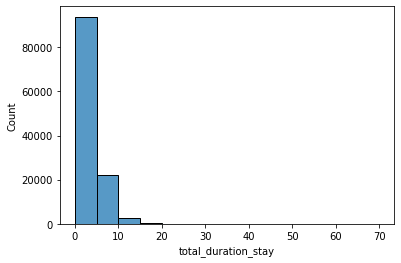

In [ ]:
sns.histplot(df['total_duration_stay'],binwidth= 5)

Based on the histogram above, data distribution is right-skewed. Therefore, grouping is done to make the distribution more even. The grouping is done for the total number of night reaching 3 weeks, then grouped from the 15th night to the 21st night (15-21. futher for total nights more than 3 weeks(>21)

In [ ]:
# grouping data based on observations of data distribution
df['duration_stay_group'] = np.where(df['total_duration_stay'] > 21, 21, 
                                        np.where(df['total_duration_stay'] > 14, 15,
                                        df['total_duration_stay']))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_duration_stay,duration_stay_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.00,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.00,0.00,0,Personal,0.00,0,0,Check-Out,2.00,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.00,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.00,0.00,0,Personal,0.00,0,0,Check-Out,2.00,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.00,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.00,0.00,0,Personal,75.00,0,0,Check-Out,1.00,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.00,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.00,0.00,0,Personal,75.00,0,0,Check-Out,1.00,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.00,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.00,0.00,0,Personal,98.00,0,1,Check-Out,2.00,2,2


In [ ]:
# create agregate table
df_group = df.groupby(['hotel', 'is_canceled', 'duration_stay_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df_group

,hotel,is_canceled,duration_stay_group,num_bookings
0,City Hotel,0,0,251
1,City Hotel,0,1,9155
2,City Hotel,0,2,10983
3,City Hotel,0,3,11889
4,City Hotel,0,4,7694
...,...,...,...,...
63,Resort Hotel,1,12,68
64,Resort Hotel,1,13,25
65,Resort Hotel,1,14,186
66,Resort Hotel,1,15,79


In [ ]:
df_pivot = df_group.pivot_table(index=['hotel', 'duration_stay_group'], columns='is_canceled', values='num_bookings').reset_index()
df_pivot

is_canceled,hotel,duration_stay_group,0,1
0,City Hotel,0,251,13
1,City Hotel,1,9155,4103
2,City Hotel,2,10983,10432
3,City Hotel,3,11889,9482
4,City Hotel,4,7694,4853
5,City Hotel,5,3210,1775
6,City Hotel,6,1111,938
7,City Hotel,7,1245,808
8,City Hotel,8,205,176
9,City Hotel,9,119,93


In [ ]:
df_pivot = df_group.pivot_table(index=['hotel', 'duration_stay_group'], columns='is_canceled', values='num_bookings').reset_index()
df_pivot

is_canceled,hotel,duration_stay_group,0,1
0,City Hotel,0,251,13
1,City Hotel,1,9155,4103
2,City Hotel,2,10983,10432
3,City Hotel,3,11889,9482
4,City Hotel,4,7694,4853
5,City Hotel,5,3210,1775
6,City Hotel,6,1111,938
7,City Hotel,7,1245,808
8,City Hotel,8,205,176
9,City Hotel,9,119,93


In [ ]:
df_pivot['percent_canceled'] = round(df_pivot[1]*100/(df_pivot[0]+df_pivot[1]),2)
df_pivot

is_canceled,hotel,duration_stay_group,0,1,percent_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


## Comparison of Cancellation Hotel Bookings and Duration of Stay on Hotel Type

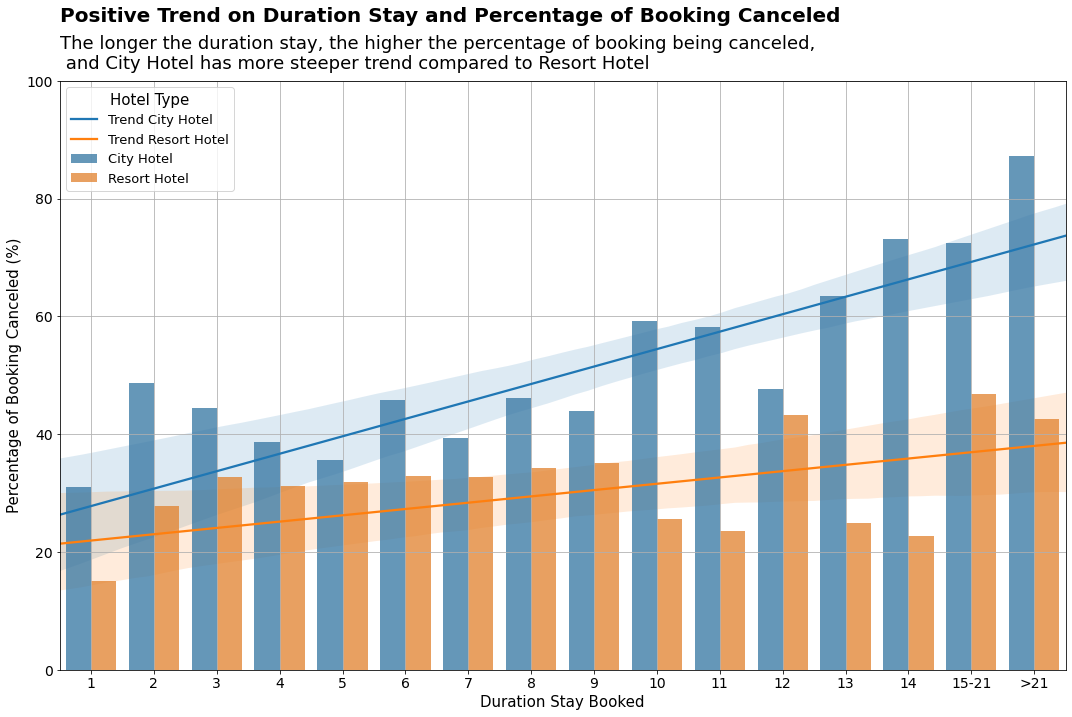

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(x='duration_stay_group', y='percent_canceled', data=df_pivot[df_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='duration_stay_group', y='percent_canceled', data=df_pivot[df_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='duration_stay_group', y='percent_canceled', hue='hotel', data=df_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) # zoom size of x-y axis label
plt.grid() # create gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # create title and size of font in legend

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) # setting customized-label in x-axis
plt.xlabel('Duration Stay Booked', fontsize=15) # setting title in x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) # setting title in y-axis
plt.ylim(0, 100) # limit for y axis
plt.xlim(0.5, 16.5) # limit for x axis

plt.text(x=0.5, y=110, s="Positive Trend on Duration Stay and Percentage of Booking Canceled", 
         fontsize=20, fontweight='bold') # create informative title
plt.text(x=0.5, y=102, s="The longer the duration stay, the higher the percentage of booking being canceled, \n and City Hotel has more steeper trend compared to Resort Hotel", 
         fontsize=18) # create note in title

plt.tight_layout() # setting layout from visualization 
plt.savefig('Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates Visualization.png'); # save picture

# Sub Task 4
Stages of Tasks
1. Create a new column that contains the categorization of the ordering time interval column (Hint: Pay attention to the interval in making categorizations)
2. Make an aggregate table that shows the comparison of the number of canceled hotel reservations to the distance between bookings for each type of hotel (Hint: 3. Pay attention to the proportion of canceled bookings)
4. Make a plot that can show the ratio of booking cancellations to the distance between bookings for each type of hotel (Hint: Pay attention to the type of plot used)
5. Write an interpretation of the plot results in the previous step (Hint: Pay attention to the effect of time intervals)

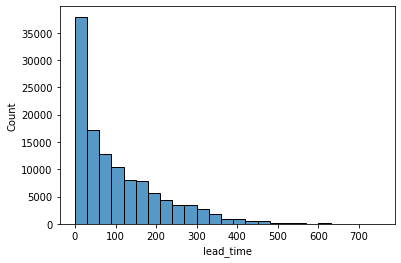

In [ ]:
sns.histplot(x='lead_time', data=df, binwidth=30)

Based on the histogram above, it can be seen that the distribution of the data looks right-skewed. Therefore, grouping is done to make the distribution more even. The time interval for ordering, which was originally in daily units, is grouped into monthly units, namely per 30 days.

In [ ]:
# Categorize the lead time column to make it simpler
df['lead_times'] = np.where(df['lead_time'] > 400, 401, df['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df['lead_time_group'] = pd.cut(df['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [ ]:
# aggregating data to calculate the number of bookings based on the group lead time that has been made and based on the type of hotel
df_book = df.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df_pivot = df_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df_pivot['all_bookings'] = df_pivot['not_canceled']+df_pivot['canceled']
df_pivot['pct_canceled'] = df_pivot['canceled']*100.0/(df_pivot['all_bookings']) 

df_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.30
1,City Hotel,30-60,7266,4608,11874,38.81
2,City Hotel,60-90,5210,3692,8902,41.47
3,City Hotel,90-120,3956,3486,7442,46.84
4,City Hotel,120-150,3064,2542,5606,45.34


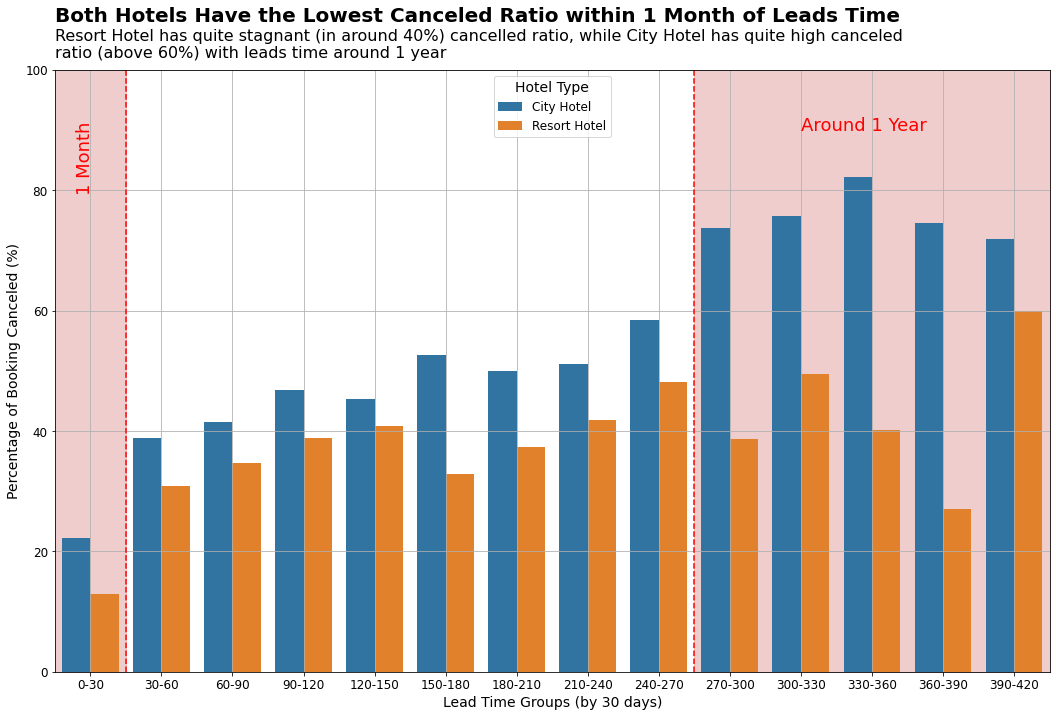

In [ ]:
plt.figure(figsize=(15,10)) # setting size of figure
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df_pivot) # plot using barplot from library seaborn

plt.tick_params(axis='both', which='major', labelsize=12) # magnifysize of x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) # setting title and size of font in legend

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) # setting title from x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) # setting title y-axis 
plt.ylim(0, 100) # limit y-axis
plt.xlim(-0.5,13.5) # limit x-axis

plt.axvline(0.5, ls='--', color='red') # create vertical line for insight highlight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # create note text
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) # create color block in area (2 vertical line)
plt.axvline(8.5, ls='--', color='red') # create vertical line for insight highlight
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red') # create note text
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) 

plt.text(x=-0.5, y=108, s="Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time", 
         fontsize=20, fontweight='bold') # create informative title
plt.text(x=-0.5, y=102, s="Resort Hotel has quite stagnant (in around 40%) cancelled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year", 
         fontsize=16) # create note for title
 
plt.tight_layout() # setting layout for title
plt.savefig('Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate Visualization.png'); # menyimpan gambar